In [41]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [42]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [43]:
#Carga de dataset
data = pd.read_csv('/content/Luxury watch.csv')

In [44]:
print(data)

                   Brand              Model    Case Material   Strap Material  \
0                  Rolex         Submariner  Stainless Steel  Stainless Steel   
1                  Omega          Seamaster         Titanium           Rubber   
2              Tag Heuer            Carrera  Stainless Steel          Leather   
3              Breitling          Navitimer  Stainless Steel  Stainless Steel   
4                Cartier          Tank Solo  Stainless Steel          Leather   
..                   ...                ...              ...              ...   
502              Breguet          Classique    18k Rose Gold          Leather   
503            Blancpain      Fifty Fathoms  Stainless Steel           Fabric   
504             Longines  Master Collection  Stainless Steel          Leather   
505  Vacheron Constantin           Overseas  Stainless Steel  Stainless Steel   
506  Frederique Constant           Classics  Stainless Steel          Leather   

    Movement Type Water Res

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                507 non-null    object 
 1   Model                507 non-null    object 
 2   Case Material        507 non-null    object 
 3   Strap Material       507 non-null    object 
 4   Movement Type        507 non-null    object 
 5   Water Resistance     507 non-null    object 
 6   Case Diameter (mm)   507 non-null    float64
 7   Case Thickness (mm)  507 non-null    float64
 8   Band Width (mm)      507 non-null    float64
 9   Dial Color           507 non-null    object 
 10  Crystal Material     507 non-null    object 
 11  Complications        507 non-null    object 
 12  Power Reserve        493 non-null    object 
 13  Price (USD)          506 non-null    object 
dtypes: float64(3), object(11)
memory usage: 55.6+ KB


In [46]:
columnas_eliminar = ['Complications', 'Power Reserve']
data = data.drop(columnas_eliminar, axis=1)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                507 non-null    object 
 1   Model                507 non-null    object 
 2   Case Material        507 non-null    object 
 3   Strap Material       507 non-null    object 
 4   Movement Type        507 non-null    object 
 5   Water Resistance     507 non-null    object 
 6   Case Diameter (mm)   507 non-null    float64
 7   Case Thickness (mm)  507 non-null    float64
 8   Band Width (mm)      507 non-null    float64
 9   Dial Color           507 non-null    object 
 10  Crystal Material     507 non-null    object 
 11  Price (USD)          506 non-null    object 
dtypes: float64(3), object(9)
memory usage: 47.7+ KB


In [48]:
columnas_eliminar = ['Price (USD)']
simbolo = ','

for columna in columnas_eliminar:
    data[columna] = data[columna].str.replace(simbolo, '', regex=False)

In [49]:
print(data)

                   Brand              Model    Case Material   Strap Material  \
0                  Rolex         Submariner  Stainless Steel  Stainless Steel   
1                  Omega          Seamaster         Titanium           Rubber   
2              Tag Heuer            Carrera  Stainless Steel          Leather   
3              Breitling          Navitimer  Stainless Steel  Stainless Steel   
4                Cartier          Tank Solo  Stainless Steel          Leather   
..                   ...                ...              ...              ...   
502              Breguet          Classique    18k Rose Gold          Leather   
503            Blancpain      Fifty Fathoms  Stainless Steel           Fabric   
504             Longines  Master Collection  Stainless Steel          Leather   
505  Vacheron Constantin           Overseas  Stainless Steel  Stainless Steel   
506  Frederique Constant           Classics  Stainless Steel          Leather   

    Movement Type Water Res

In [51]:
columna_categorica = 'Price (USD)'
print(data[columna_categorica].unique())

['9500' '5800' '4200' '7900' '2800' '5500' '1400' '1200' '650' '495'
 '1150' '1800' '4500' '16000' '22000' '19000' '3200' '3900' '3500' '14000'
 '4800' '7500' nan '6200' '21000' '9000' '5250' '8800' '17800' '11500'
 '6500' '23500' '10000' '21500' '9800' '19900' '14400' '12800' '7800'
 '9200' '8400' '1600' '29800' '24500' '7950' '8200' '9400' '6700' '6100'
 '16300' '3600' '8900' '44500' '17000' '8300' '12000' '6900' '15500'
 '11200' '18900' '49800' '9600' '14700' '10600' '19200' '5600' '995' '545'
 '3800' '1500' '2500' '38000' '55000' '23000' '8500' '6000' '16500'
 '16800' '19800' '47000' '18500' '2200' '9950' '4950' '13900' '20500'
 '18000' '13500' '26000' '23100' '17900' '15200' '1300' '2750' '8700'
 '3350' '8000' '5700' '34000' '6800' '5300' '17500' '15000' '5000' '12500'
 '19500' '20800' '13000' '9700' '7400' '4300' '9100' '20900' '1700' '2600'
 '4400' '595' '5400' '25000' '20000' '10500' '51000' '14500' '6400'
 '20400' '62500' '14900' '5900' '2700' '4700' '4600' '39500' '6550' '385

In [52]:
# Supongamos que 'data' es tu DataFrame
columna_categorica = 'Price (USD)'
columna_numerica = 'Price'

# Crea una nueva columna numérica y copia los valores de la columna categórica
data[columna_numerica] = pd.to_numeric(data[columna_categorica], errors='coerce')

# Elimina la columna categórica original
data.drop(columna_categorica, axis=1, inplace=True)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                507 non-null    object 
 1   Model                507 non-null    object 
 2   Case Material        507 non-null    object 
 3   Strap Material       507 non-null    object 
 4   Movement Type        507 non-null    object 
 5   Water Resistance     507 non-null    object 
 6   Case Diameter (mm)   507 non-null    float64
 7   Case Thickness (mm)  507 non-null    float64
 8   Band Width (mm)      507 non-null    float64
 9   Dial Color           507 non-null    object 
 10  Crystal Material     507 non-null    object 
 11  Price                506 non-null    float64
dtypes: float64(4), object(8)
memory usage: 47.7+ KB


In [54]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns


In [55]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [56]:
#resultado
print(data)

     Brand  Model  Case Material  Strap Material  Movement Type  \
0       29     85             13              11              0   
1       23     80             14               9              0   
2       33     16             13               5              0   
3        7     59             13              11              0   
4       10     89             13               5              3   
..     ...    ...            ...             ...            ...   
502      6     22              4               5              0   
503      5     35             13               2              0   
504     21     53             13               5              0   
505     37     61             13              11              0   
506     13     21             13               5              0   

     Water Resistance  Case Diameter (mm)  Case Thickness (mm)  \
0                   7                40.0                13.00   
1                  11                43.5                14.47 

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                507 non-null    int64  
 1   Model                507 non-null    int64  
 2   Case Material        507 non-null    int64  
 3   Strap Material       507 non-null    int64  
 4   Movement Type        507 non-null    int64  
 5   Water Resistance     507 non-null    int64  
 6   Case Diameter (mm)   507 non-null    float64
 7   Case Thickness (mm)  507 non-null    float64
 8   Band Width (mm)      507 non-null    float64
 9   Dial Color           507 non-null    int64  
 10  Crystal Material     507 non-null    int64  
 11  Price                506 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 47.7 KB


In [58]:
#llenar datos vacios
columnas_especificas = ['Price']
media_columnas = data[columnas_especificas].mean()
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                507 non-null    int64  
 1   Model                507 non-null    int64  
 2   Case Material        507 non-null    int64  
 3   Strap Material       507 non-null    int64  
 4   Movement Type        507 non-null    int64  
 5   Water Resistance     507 non-null    int64  
 6   Case Diameter (mm)   507 non-null    float64
 7   Case Thickness (mm)  507 non-null    float64
 8   Band Width (mm)      507 non-null    float64
 9   Dial Color           507 non-null    int64  
 10  Crystal Material     507 non-null    int64  
 11  Price                507 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 47.7 KB


In [95]:
# Lectura de Datos
X = data.iloc[:, :11]
y = data.iloc[:, 11]
m = y.size

In [96]:
print(X)
print('*'*25)
print(y)

     Brand  Model  Case Material  Strap Material  Movement Type  \
0       29     85             13              11              0   
1       23     80             14               9              0   
2       33     16             13               5              0   
3        7     59             13              11              0   
4       10     89             13               5              3   
..     ...    ...            ...             ...            ...   
502      6     22              4               5              0   
503      5     35             13               2              0   
504     21     53             13               5              0   
505     37     61             13              11              0   
506     13     21             13               5              0   

     Water Resistance  Case Diameter (mm)  Case Thickness (mm)  \
0                   7                40.0                13.00   
1                  11                43.5                14.47 

In [97]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

# Normaliza entre -0.5 y 0.5 (revisar) porque se dan valores negativos y postivos

In [98]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

     Brand  Model  Case Material  Strap Material  Movement Type  \
0       29     85             13              11              0   
1       23     80             14               9              0   
2       33     16             13               5              0   
3        7     59             13              11              0   
4       10     89             13               5              3   
..     ...    ...            ...             ...            ...   
502      6     22              4               5              0   
503      5     35             13               2              0   
504     21     53             13               5              0   
505     37     61             13              11              0   
506     13     21             13               5              0   

     Water Resistance  Case Diameter (mm)  Case Thickness (mm)  \
0                   7                40.0                13.00   
1                  11                43.5                14.47 

In [99]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [100]:
print(X)

[[ 1.          0.83184285  1.57733546 ... -0.66728862 -0.81481391
   0.18570235]
 [ 1.          0.30079018  1.36891506 ... -0.06369303 -0.37203722
   0.18570235]
 [ 1.          1.18587795 -1.29886607 ... -0.66728862  1.84184624
   0.18570235]
 ...
 [ 1.          0.12377263  0.24344489 ... -0.66728862 -0.37203722
   0.18570235]
 [ 1.          1.53991306  0.57691753 ...  0.53990257 -0.37203722
   0.18570235]
 [ 1.         -0.58429759 -1.09044567 ... -0.66728862  1.39906955
   0.18570235]]


In [101]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [102]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [12001.75347016  -793.21389528   666.41046016 -1831.63365867
  2084.72330359 -1197.89226254  -709.02667612  1803.63553215
 -4683.54749524  -238.31296921  -601.6903631   1015.84668314]
El valor predecido es (usando el descenso por el gradiente): 11748.5093


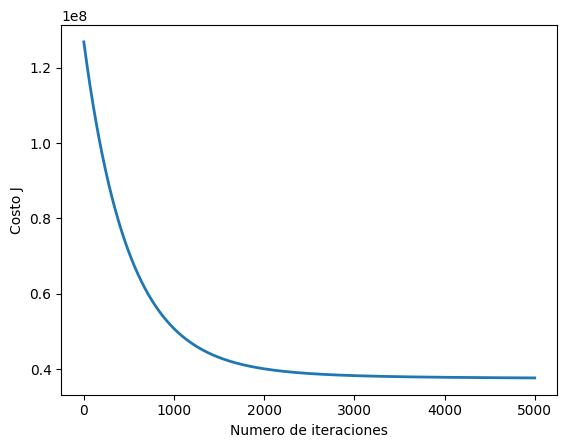

In [103]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # si es grande se resta más a los thetas, si es menor alfa va cambiando poco a poco
#se necesitan muchas iteraciones, si es grande el alfa salta mucho y no llega facilmente
# mejores alfas = 0.1, 0.01, 0.001, 0.0001, 0.0005
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(12)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un smart watch con distintas caracteristicas
X_array = [1, 29, 85, 13, 11, 0, 7, 40, 13, 20, 0, 3]
X_array[1:12] = (X_array[1:12] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))

In [83]:
# Generar un nuevo dataset con la columna movida
nuevo_dataset = data.copy()

# Guardar el nuevo DataFrame en un archivo CSV
nuevo_dataset.to_csv('luxury_watchnu.csv', index=False)

print("Archivo 'luxury_watchnu.csv' creado exitosamente.")

Archivo 'luxury_watchnu.csv' creado exitosamente.


In [84]:
#Carga de dataset
data = pd.read_csv('/content/luxury_watchnu.csv')

In [86]:
print(data)

     Brand  Model  Case Material  Strap Material  Movement Type  \
0       29     85             13              11              0   
1       23     80             14               9              0   
2       33     16             13               5              0   
3        7     59             13              11              0   
4       10     89             13               5              3   
..     ...    ...            ...             ...            ...   
502      6     22              4               5              0   
503      5     35             13               2              0   
504     21     53             13               5              0   
505     37     61             13              11              0   
506     13     21             13               5              0   

     Water Resistance  Case Diameter (mm)  Case Thickness (mm)  \
0                   7                40.0                13.00   
1                  11                43.5                14.47 

In [88]:
# Lectura de Datos
X = data.iloc[:, :11]
y = data.iloc[:, 11]
m = y.size

In [89]:
print(X)
print('*'*25)
print(y)

     Brand  Model  Case Material  Strap Material  Movement Type  \
0       29     85             13              11              0   
1       23     80             14               9              0   
2       33     16             13               5              0   
3        7     59             13              11              0   
4       10     89             13               5              3   
..     ...    ...            ...             ...            ...   
502      6     22              4               5              0   
503      5     35             13               2              0   
504     21     53             13               5              0   
505     37     61             13              11              0   
506     13     21             13               5              0   

     Water Resistance  Case Diameter (mm)  Case Thickness (mm)  \
0                   7                40.0                13.00   
1                  11                43.5                14.47 

In [90]:
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [91]:
# importante que para usar m>n, evitar datos redundantes, no se normaliza
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [92]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 29, 85, 13, 11, 0, 7, 40, 13, 20, 0, 3]
price = np.dot(X_array, theta)

print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 3961.5615516    -70.65600106    24.81972362  -741.37010772
   607.92586267 -1793.33023262  -282.21706245  1036.86944002
 -2147.48129772  -414.9272471   -322.25042615  2212.83577902]
Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): $10994
